#K-Means Clustering:

* Что это: K-Means — это один из самых популярных методов кластеризации. Он разбивает набор данных на заранее заданное количество кластеров (K) путем минимизации среднеквадратичного расстояния между точками и их центроидами.

* Как работает: Алгоритм начинает с произвольного выбора центроидов для кластеров, затем точки данных присваиваются ближайшему центроиду, после чего центроиды пересчитываются как среднее положение точек в каждом кластере. Процесс повторяется до сходимости.

* Особенности:
1. Чувствителен к выбору начальных центроидов, что может влиять на итоговую кластеризацию.
2. Подходит для данных с явными кластерами, но может давать плохие результаты для неоднородных или перекрывающихся кластеров.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
# Создание искусственных данных
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [ ]:
# Применение K-Means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

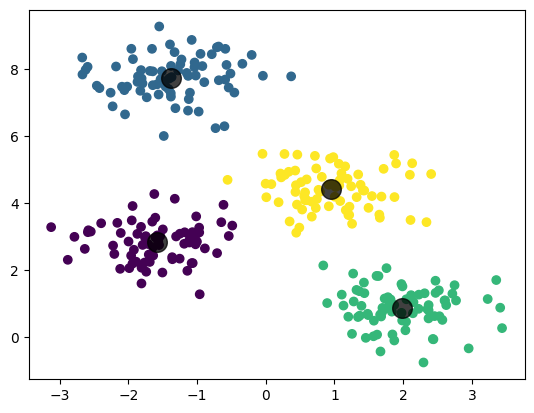

In [ ]:
# Визуализация кластеров
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
plt.show()

#Hierarchical Clustering (Иерархическая кластеризация):

* Что это: Этот метод строит иерархию кластеров, представляющую собой дерево (дендрограмму), где каждый узел соответствует кластеру.
* Как работает: Начинается с того, что каждая точка данных представляет собой отдельный кластер, затем на каждом шаге ближайшие кластеры объединяются до тех пор, пока все точки не будут представлены в одном кластере.
* Особенности:
1. Позволяет создавать дендрограммы, которые визуально отображают структуру данных и позволяют выбирать оптимальное количество кластеров.
2. Может быть агломеративным (объединяющим) или дивизивным (разделяющим) в зависимости от подхода.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Генерация случайных данных
np.random.seed(0)
X = np.random.rand(10, 2)

Параметр 'single' в функции linkage() относится к методу объединения (или расстоянию) для построения матрицы связей в иерархической кластеризации.

В частности, 'single' относится к методу объединения (или расстоянию) "single-linkage" или "методу наименьшего расстояния". В этом методе расстояние между двумя кластерами определяется как минимальное расстояние между точками в разных кластерах.

Когда мы используем 'single' в linkage():

Алгоритм ищет две самые близкие точки (одну из каждого кластера) и считает расстояние между ними.
Это расстояние становится расстоянием между кластерами.
Этот процесс повторяется, пока все точки не объединятся в один кластер.
Метод "single-linkage" может приводить к кластерам длинной формы (эффект "цепи") и чувствителен к шумам и выбросам данных. Однако он может работать хорошо для кластеризации данных, где кластеры образуют непрерывные структуры.

In [ ]:
# Иерархическая кластеризация
linked = linkage(X, 'single')

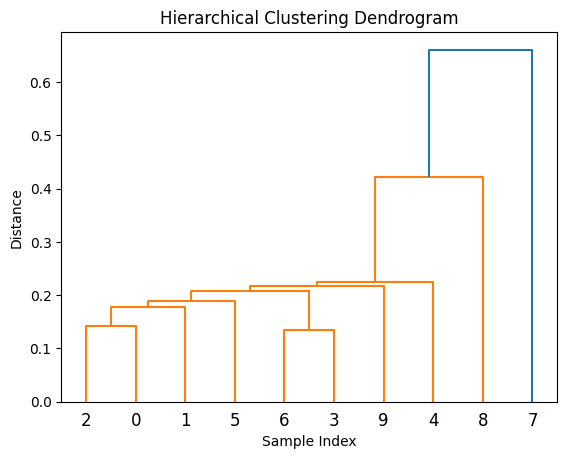

In [ ]:
# Построение дендрограммы
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

#DBSCAN Clustering:

* Что это: DBSCAN основан на плотности данных. Он идентифицирует кластеры как области высокой плотности, разделенные областями низкой плотности.
* Как работает: Алгоритм начинает с случайной точки и ищет соседей внутри заданного радиуса. Если точка содержит достаточное количество соседей, она становится частью кластера. Процесс распространяется от точки к точке до тех пор, пока все точки не будут посещены.
* Особенности:
1. Может обрабатывать кластеры произвольной формы и обнаруживать выбросы (шум).
2. Не требует заранее указанного числа кластеров, но имеет параметры, такие как радиус эпсилон (eps) и минимальное количество точек в кластере (min_samples).

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Создание искусственных данных
X, _ = make_moons(n_samples=200, shuffle=True, noise=0.1)

In [ ]:
# Применение K-Means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

clusters = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


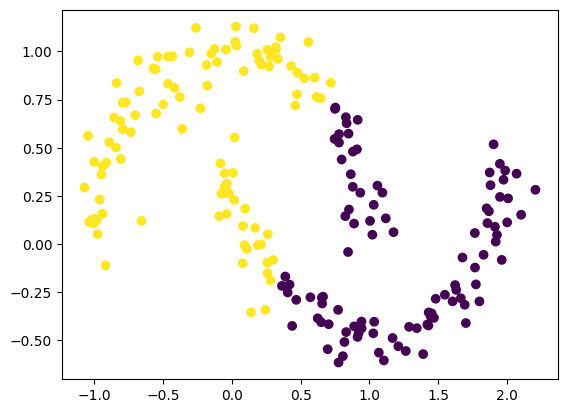

In [ ]:
# Визуализация кластеров
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.show()

In [ ]:
# X = StandardScaler().fit_transform(X)

In [ ]:
# Применение DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
clusters = dbscan.fit_predict(X)

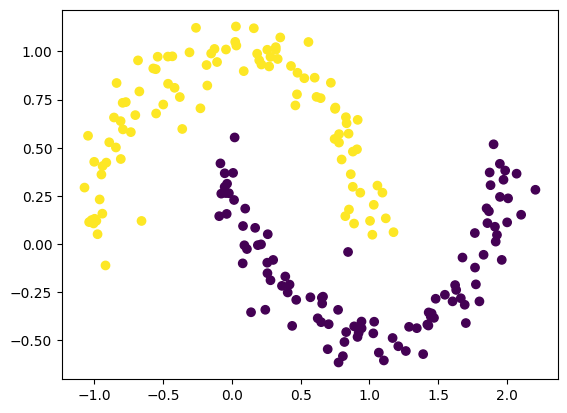

In [ ]:
# Визуализация кластеров
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.show()